<a href="https://colab.research.google.com/github/mro9kh/DS3001-final-project/blob/main/DS3001_Project2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programming Lab #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
  
The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs. If performance drops on the testing data, you know there's a problem.
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is deeply unsporting and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the lowest $RMSE$ on the testing data. A simple linear model with some polynomials and dummy variables achieves an $R^2$ of .087 and a $RMSE$ of .206.

In [2]:
! git clone https://www.github.com/DS3001/group17

Cloning into 'group17'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 44 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (44/44), 3.56 MiB | 3.80 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [3]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('/content/group17/project_2/data/training_data.csv')
df_test = pd.read_csv('/content/group17/project_2/data/testing_data.csv')

y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [4]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


R2:  0.08717964343852191
RMSE:  0.20599583849612824


This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

## Submission

Half of each student's grade is based on their commits to the repo. Each student is expected to do something specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub, this is observable. A student can contribute by cleaning data, creating visualizations,performing analytic analyses,  or writing about results, but everyone has to do something substantial. A student's work doesn't need to make it into the final report to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the written report. Groups will work together on combining results and writing up findings in a Jupyter noteb,ok, using code chunks to execute Python commands and markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or Rivana from beginning to end without any errors.

mbers submit.

## Criteria

The project is graded based on four criteria:

  - Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
  - Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed?
  - Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
  - Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).

# Data Wrangling and EDA - Prepping the Training Set

In [5]:
X_train.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown


In [6]:
X_train.shape

(4087, 12)

In [7]:
## looking at the data and examining how many missing rows we have:
X_train.isna().sum()

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

There does not appear to be any missing values as we have corrected that above.

In [8]:
## summary statistics: --> so that we can see which columns are
X_train.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,2561.672865,36383.068265,43.324169,0.097871,0.056031,106.010396,28.923371
std,1474.961020,21189.857848,22.531019,0.297177,0.230010,45.047912,7.688969
min,1.000000,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,1295.500000,17417.500000,26.000000,0.000000,0.000000,77.295000,23.900000
50%,2556.000000,36814.000000,45.000000,0.000000,0.000000,92.000000,28.400000
75%,3831.500000,54584.500000,61.000000,0.000000,0.000000,113.845000,32.800000
max,5110.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


**The following columns need to be converted to a factor:** hypertension, heart_disease

**The following columns need to be one hot encoded and then converted to a factor:** ever_married, work_type, residence_area, smoking_status

In [10]:
# converting columns to a factor:
X_train['hypertension'] = X_train['hypertension'].astype('category')
X_train['heart_disease'] = X_train['heart_disease'].astype('category')

<Axes: >

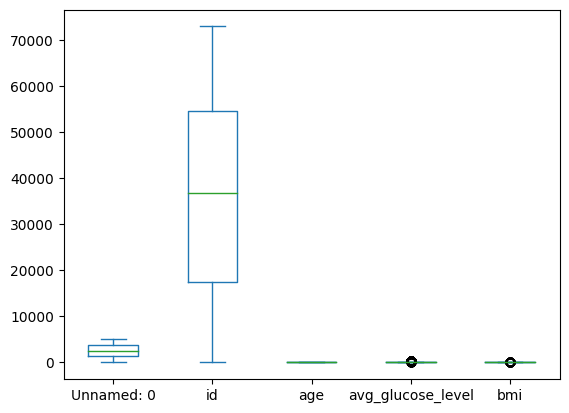

In [11]:
# checking for outliers:
X_train.plot.box()

# There are a few outliers in the average glucose and bmi but we cant tell for sure. we will make an individual boxplot to confirm

<Axes: >

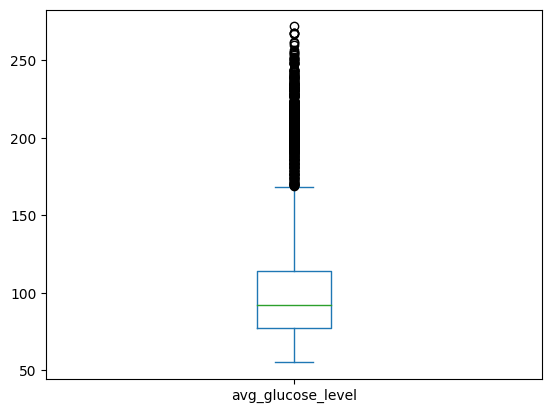

In [12]:
X_train['avg_glucose_level'].plot.box() # we notice a lot more outliers

<Axes: >

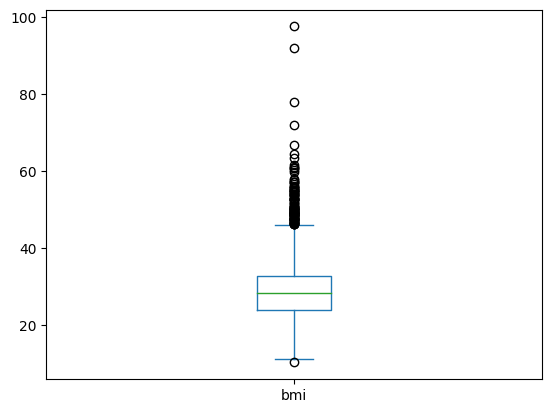

In [13]:
X_train['bmi'].plot.box()  # we notice a lot more outliers

We will be windsorizing the outliers so that our model can perform a bit better. This is our method for dealing with the outliers

In [14]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

<Axes: >

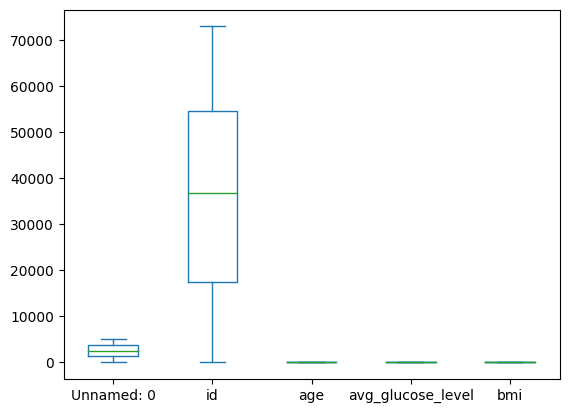

In [15]:
c_winds = ['bmi', 'avg_glucose_level']
X_train[c_winds] = X_train[c_winds].apply(windsorize)

X_train.plot.box() # we can see that the columns have been successfully windsorized

We will be checking the distributions of the following quantitative variables in order to check if we need to transform any variables: age, BMI

We will also be checking the following categorical variables to make sure there is no error in data entry that we need to fix before we encode the variables: Gender, Work_Type, Residence Type, Smoking Status

<Axes: >

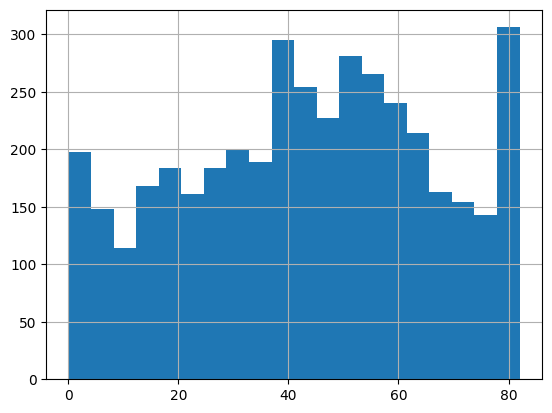

In [16]:
# checking the distributions:
X_train['age'].hist(bins=20)

<Axes: >

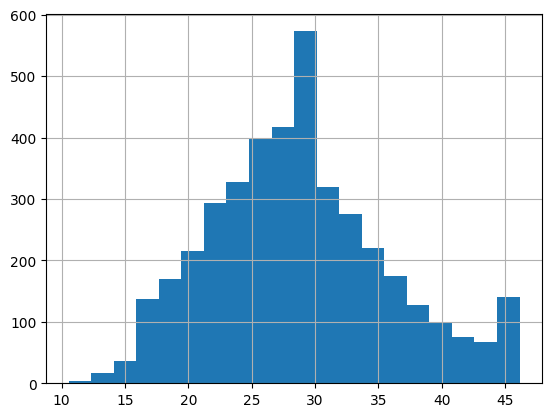

In [17]:
X_train['bmi'].hist(bins=20)

Both histograms are pretty good at describing the distribution of our data, so we will not need to transform the variable. We will now look at the categorical variables: Gender, Work_Type, Residence Type, Smoking Status

In [18]:
# checking to make sure other string colums are not differing in phrases
print('----------------------------------------')
print(X_train['gender'].value_counts())
print('----------------------------------------')
print(X_train['work_type'].value_counts())
print('----------------------------------------')
print(X_train['Residence_type'].value_counts())
print('----------------------------------------')
print(X_train['smoking_status'].value_counts())

----------------------------------------
Female    2398
Male      1688
Other        1
Name: gender, dtype: int64
----------------------------------------
Private          2329
Self-employed     667
children          542
Govt_job          534
Never_worked       15
Name: work_type, dtype: int64
----------------------------------------
Urban    2052
Rural    2035
Name: Residence_type, dtype: int64
----------------------------------------
never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64


now that we have seen that there are no errors in data entry with the categorical variables and that the quantitative variables do not appear to need transformations, we will move on to encoding our categorical variables.

In [20]:
# encoding columns and then turning them into a factor
X_train = pd.get_dummies(X_train, columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender'])

KeyError: ignored

In [21]:
# deleting the first two columns as they are not relevant to predicting whether or not someone had a stroke.
X_train.drop(df_train.columns[:2], axis=1, inplace=True)


In [22]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,36.0,0,0,65.87,32.2,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,45.0,0,0,68.66,25.3,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,58.0,0,0,168.67,30.7,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,61.0,0,0,69.88,27.1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,78.0,0,0,103.86,30.6,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0


Now that we have cleaned our training set, we can move onto prepping our test set

## EDA and Data Wrangling - Prepping the Test Set

we will perform the same preprocessing steps to the test set as seen in the training set to mantain consistency.

In [23]:
X_test.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,251,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked
1,252,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown
2,253,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
3,255,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown
4,259,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked


In [24]:
X_test.isna().sum()  # shows no missing values

Unnamed: 0           0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [25]:
X_test.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2530.838710,37056.215054,42.836872,0.095797,0.045943,106.696129,28.772579
std,1476.989308,21050.647292,22.942857,0.294456,0.209465,46.231319,7.736709
min,2.000000,77.000000,0.160000,0.000000,0.000000,55.250000,11.500000
25%,1180.000000,18993.000000,24.000000,0.000000,0.000000,76.775000,23.450000
50%,2548.000000,37395.000000,44.000000,0.000000,0.000000,90.970000,28.200000
75%,3835.000000,54840.500000,61.000000,0.000000,0.000000,114.955000,32.700000
max,5109.000000,72861.000000,82.000000,1.000000,1.000000,263.560000,64.800000


In [26]:
# converting columns to a factor:
X_test['hypertension'] = X_test['hypertension'].astype('category')
X_test['heart_disease'] = X_test['heart_disease'].astype('category')

In [27]:
X_test.describe() # to make sure that we have encoded our variables

,Unnamed: 0,id,age,avg_glucose_level,bmi
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2530.838710,37056.215054,42.836872,106.696129,28.772579
std,1476.989308,21050.647292,22.942857,46.231319,7.736709
min,2.000000,77.000000,0.160000,55.250000,11.500000
25%,1180.000000,18993.000000,24.000000,76.775000,23.450000
50%,2548.000000,37395.000000,44.000000,90.970000,28.200000
75%,3835.000000,54840.500000,61.000000,114.955000,32.700000
max,5109.000000,72861.000000,82.000000,263.560000,64.800000


<Axes: >

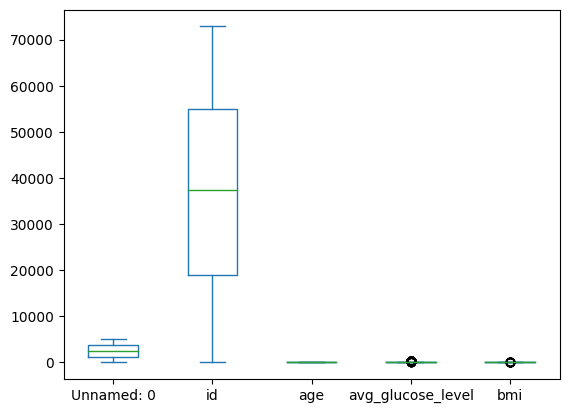

In [28]:
# checking for outliers:
X_test.plot.box()

# There are a few outliers in the average glucose and bmi but we cnat tell for sure. we will make an individual boxplot to confirm

In [29]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

<Axes: >

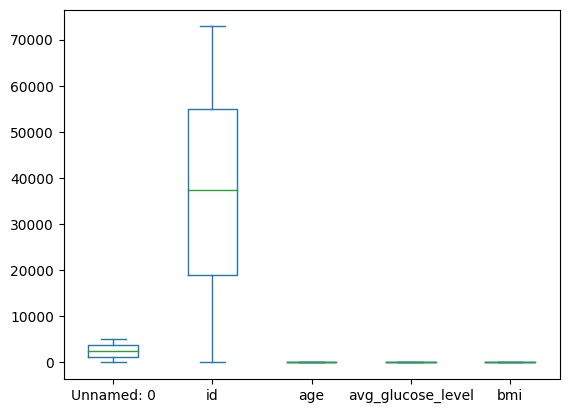

In [30]:
c_winds = ['bmi', 'avg_glucose_level']
X_test[c_winds] = X_test[c_winds].apply(windsorize)

X_test.plot.box() # we can see that the columns have been successfully windsorized

<Axes: >

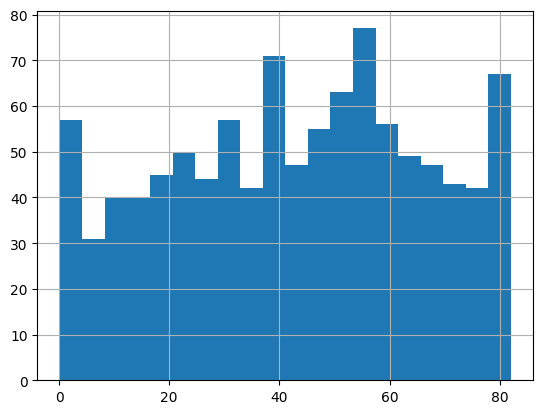

In [31]:
# checking the distributions:
X_test['age'].hist(bins=20)

<Axes: >

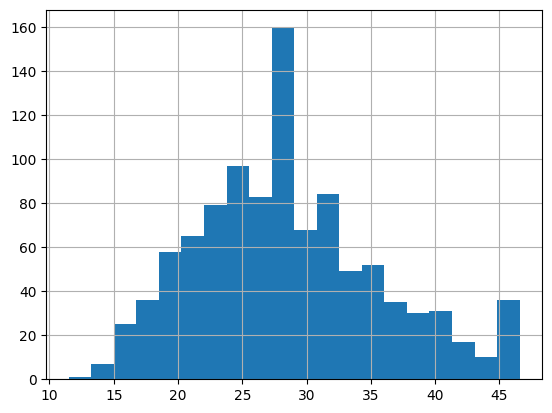

In [32]:
# checking the distributions:
X_test['bmi'].hist(bins=20)

both histograms appear to show the distribution of our data well. We do not need to transform them

In [33]:
# checking to make sure other string colums are not differing in phrases
print('----------------------------------------')
print(X_test['gender'].value_counts())
print('----------------------------------------')
print(X_test['work_type'].value_counts())
print('----------------------------------------')
print(X_test['Residence_type'].value_counts())
print('----------------------------------------')
print(X_test['smoking_status'].value_counts())

----------------------------------------
Female    596
Male      427
Name: gender, dtype: int64
----------------------------------------
Private          596
Self-employed    152
children         145
Govt_job         123
Never_worked       7
Name: work_type, dtype: int64
----------------------------------------
Urban    544
Rural    479
Name: Residence_type, dtype: int64
----------------------------------------
never smoked       387
Unknown            303
formerly smoked    186
smokes             147
Name: smoking_status, dtype: int64


In [34]:
# encoding columns and then turning them into a factor
X_test = pd.get_dummies(X_test, columns=['ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender'])

In [35]:
# deleting the first two columns as they are not relevant to predicting whether or not someone had a stroke.
X_test.drop(X_test.columns[:2], axis=1, inplace=True)

In [36]:
X_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,58.0,1,0,87.960,39.200,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
1,8.0,0,0,110.890,17.600,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
2,70.0,0,0,69.040,35.900,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,47.0,0,0,172.225,46.575,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
4,74.0,1,0,172.225,46.575,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


Sometimes if a categorical group is not represented in the test set, a column will not be created when the dummy encoding happens. If the same columns are not represented in both datasets, many machine learning models will not work. For this reason we will observe the shape of both data sets X_train and X_test and if there are columns missing, we will create these columns with a column of 0s.

In [37]:
print(X_test.shape)
print(X_train.shape)

(1023, 20)
(4087, 21)


In [38]:
# Get the list of columns in the training set
train_col = X_train.columns

# Get the list of columns in the test set
test_col = X_test.columns

# Find the columns that are in the training set but not in the test set
missing_columns = set(train_col) - set(test_col)

print(missing_columns)

{'gender_Other'}


In [39]:
# Create the missing columns in the test set and set values to 0
for column in missing_columns:
    X_test[column] = 0

In [40]:
# confirming the columns are the same
train_col = X_train.columns
test_col = X_test.columns

print(train_col)
print(test_col)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Female', 'gender_Male',
       'gender_Other'],
      dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Female', 'gender_Male',
       'gender

## Model Building

We are interested in not only building a model that predicts stroke well, but we are also interested in knowing whether or not a model with only quantitative variables performs better. For that reason, the following code demonstrates a classification model build that looks at all variables including quantitative and qualitative variables as well as just quantitative variables.

In [47]:
# performance function

def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})


## KNN with only the quantitative variables --> this is not running idk why we should fix it

We want to first use the k means clustering in order to see if the quantitative variables are affective in predicting whether or not someone had a stroke. We will divide our training and test set into only quantitative variables, and we will then see how well our model performs

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# making the y variable a categorical var
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [52]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: category
Categories (2, int64): [0, 1]

In [53]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: category
Categories (2, int64): [0, 1]

In [41]:
## quantitative variables to pick: age,avg_glucose_level,bmi

quantvar = ['age', 'avg_glucose_level', 'bmi']

X_trainquant = X_train[quantvar]
X_testquant = X_test[quantvar]

X_trainquant.head()

,age,avg_glucose_level,bmi
0,36.0,65.87,32.2
1,45.0,68.66,25.3
2,58.0,168.67,30.7
3,61.0,69.88,27.1
4,78.0,103.86,30.6


In [42]:
X_testquant.head()

,age,avg_glucose_level,bmi
0,58.0,87.960,39.200
1,8.0,110.890,17.600
2,70.0,69.040,35.900
3,47.0,172.225,46.575
4,74.0,172.225,46.575


In [49]:
## kNN Classifier sample code:
from sklearn.neighbors import KNeighborsClassifier

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_trainquant.apply(maxmin)
X_test_knn = X_testquant.apply(maxmin)


In [50]:
# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
MCC = np.zeros(k_bar-1)
for k in range(k_bar-1):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    perf = performance(y_test,y_hat)
    MCC[k] = perf['mcc']

MCC_max = np.max(MCC) # Lowest recorded SSE
max_index = np.where(MCC==MCC_max) # Find the indices of y that equal the minimum
k_star = k_grid[max_index][0] # Find the optimal value of k

IndexError: ignored

In [ ]:

## SSE plot:
plt.plot(k_grid,MCC)
plt.xlabel("k")
plt.ylabel("MCC")
plt.title('MCC')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=np.max([3,k_star]))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)

## Compute performance:
perf_knn = performance(y_test,y_hat_knn)
print(perf_knn)

## Linear Regression with only quantitative variables

In [51]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm) # Compute predicted values from the model
y_hat_lm = np.round(y_hat_lm) # Round values to 0 or 1

# Compute performance:
perf_lm = performance(y_test,y_hat_lm)
print(perf_lm)

IndexError: ignored